# Importing necessary Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Loading the data from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/sales_data.csv')
df

,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.0,01/05/2023,North
1,Bob,Mouse,3.0,NaN,03/05/2023,South
2,NaN,Monitor,2.0,150.0,01/05/2023,East
3,David,Keyboard,5.0,25.0,01/05/2023,North
4,Alice,Keyboard,5.0,25.0,01/05/2023,North
5,Eve,Laptop,NaN,900.0,NaN,West
6,Frank,Mouse,1.0,20.0,04/05/2023,NaN
7,Grace,Monitor,2.0,150.0,02/05/2023,East
8,Bob,Mouse,3.0,NaN,03/05/2023,South
9,Henry,Laptop,1.0,900.0,05/05/2023,West


In [4]:
print("Original Data:")
print(df.head(10))

Original Data:
  Customer Name   Product  Quantity  Price   Sale Date Region
0         Alice  Keyboard       5.0   25.0  01/05/2023  North
1           Bob     Mouse       3.0    NaN  03/05/2023  South
2           NaN   Monitor       2.0  150.0  01/05/2023   East
3         David  Keyboard       5.0   25.0  01/05/2023  North
4         Alice  Keyboard       5.0   25.0  01/05/2023  North
5           Eve    Laptop       NaN  900.0         NaN   West
6         Frank     Mouse       1.0   20.0  04/05/2023    NaN
7         Grace   Monitor       2.0  150.0  02/05/2023   East
8           Bob     Mouse       3.0    NaN  03/05/2023  South
9         Henry    Laptop       1.0  900.0  05/05/2023   West


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  10 non-null     object 
 1   Product        11 non-null     object 
 2   Quantity       10 non-null     float64
 3   Price          9 non-null      float64
 4   Sale Date      10 non-null     object 
 5   Region         10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 660.0+ bytes
None


# Detecting Mising values & plotting it

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer Name    1
Product          0
Quantity         1
Price            2
Sale Date        1
Region           1
dtype: int64


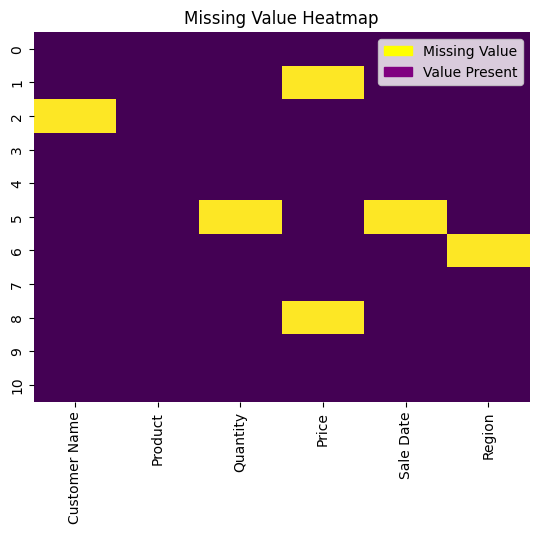

In [7]:
# Visualization of missing values using seaborn
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Value Heatmap")
# Create custom legend
missing_patch = mpatches.Patch(color='yellow', label='Missing Value')
present_patch = mpatches.Patch(color='purple', label='Value Present')

plt.legend(handles=[missing_patch, present_patch], loc='upper right')
plt.show()


# Handling the Missing values appropriately

In [8]:
# Filling missing quantity values with mean
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df

/tmp/ipython-input-2633299442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.0,01/05/2023,North
1,Bob,Mouse,3.0,NaN,03/05/2023,South
2,NaN,Monitor,2.0,150.0,01/05/2023,East
3,David,Keyboard,5.0,25.0,01/05/2023,North
4,Alice,Keyboard,5.0,25.0,01/05/2023,North
5,Eve,Laptop,3.1,900.0,NaN,West
6,Frank,Mouse,1.0,20.0,04/05/2023,NaN
7,Grace,Monitor,2.0,150.0,02/05/2023,East
8,Bob,Mouse,3.0,NaN,03/05/2023,South
9,Henry,Laptop,1.0,900.0,05/05/2023,West


In [9]:
# Fill missing price values with mean
df['Price'].fillna(df['Price'].mean(), inplace=True)
df

/tmp/ipython-input-3890562258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North
1,Bob,Mouse,3.0,246.666667,03/05/2023,South
2,NaN,Monitor,2.0,150.000000,01/05/2023,East
3,David,Keyboard,5.0,25.000000,01/05/2023,North
4,Alice,Keyboard,5.0,25.000000,01/05/2023,North
5,Eve,Laptop,3.1,900.000000,NaN,West
6,Frank,Mouse,1.0,20.000000,04/05/2023,NaN
7,Grace,Monitor,2.0,150.000000,02/05/2023,East
8,Bob,Mouse,3.0,246.666667,03/05/2023,South
9,Henry,Laptop,1.0,900.000000,05/05/2023,West


In [10]:
# Filling customer name columns with 'Unknown'
df['Customer Name'].fillna('Unknown', inplace=True)
df

/tmp/ipython-input-484762125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Name'].fillna('Unknown', inplace=True)


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North
1,Bob,Mouse,3.0,246.666667,03/05/2023,South
2,Unknown,Monitor,2.0,150.000000,01/05/2023,East
3,David,Keyboard,5.0,25.000000,01/05/2023,North
4,Alice,Keyboard,5.0,25.000000,01/05/2023,North
5,Eve,Laptop,3.1,900.000000,NaN,West
6,Frank,Mouse,1.0,20.000000,04/05/2023,NaN
7,Grace,Monitor,2.0,150.000000,02/05/2023,East
8,Bob,Mouse,3.0,246.666667,03/05/2023,South
9,Henry,Laptop,1.0,900.000000,05/05/2023,West


In [11]:
# Filling region columns with 'Unknown'
df['Region'].fillna('Unknown', inplace=True)
df

/tmp/ipython-input-1116724174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna('Unknown', inplace=True)


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North
1,Bob,Mouse,3.0,246.666667,03/05/2023,South
2,Unknown,Monitor,2.0,150.000000,01/05/2023,East
3,David,Keyboard,5.0,25.000000,01/05/2023,North
4,Alice,Keyboard,5.0,25.000000,01/05/2023,North
5,Eve,Laptop,3.1,900.000000,NaN,West
6,Frank,Mouse,1.0,20.000000,04/05/2023,Unknown
7,Grace,Monitor,2.0,150.000000,02/05/2023,East
8,Bob,Mouse,3.0,246.666667,03/05/2023,South
9,Henry,Laptop,1.0,900.000000,05/05/2023,West


In [12]:
# Filling missing dates with mode (most frequent date)
df['Sale Date'].fillna(df['Sale Date'].mode()[0], inplace=True)
df

/tmp/ipython-input-193707503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sale Date'].fillna(df['Sale Date'].mode()[0], inplace=True)


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North
1,Bob,Mouse,3.0,246.666667,03/05/2023,South
2,Unknown,Monitor,2.0,150.000000,01/05/2023,East
3,David,Keyboard,5.0,25.000000,01/05/2023,North
4,Alice,Keyboard,5.0,25.000000,01/05/2023,North
5,Eve,Laptop,3.1,900.000000,01/05/2023,West
6,Frank,Mouse,1.0,20.000000,04/05/2023,Unknown
7,Grace,Monitor,2.0,150.000000,02/05/2023,East
8,Bob,Mouse,3.0,246.666667,03/05/2023,South
9,Henry,Laptop,1.0,900.000000,05/05/2023,West


In [13]:
print("\nData after handling missing values:")
print(df.head(10))


Data after handling missing values:
  Customer Name   Product  Quantity       Price   Sale Date   Region
0         Alice  Keyboard       5.0   25.000000  01/05/2023    North
1           Bob     Mouse       3.0  246.666667  03/05/2023    South
2       Unknown   Monitor       2.0  150.000000  01/05/2023     East
3         David  Keyboard       5.0   25.000000  01/05/2023    North
4         Alice  Keyboard       5.0   25.000000  01/05/2023    North
5           Eve    Laptop       3.1  900.000000  01/05/2023     West
6         Frank     Mouse       1.0   20.000000  04/05/2023  Unknown
7         Grace   Monitor       2.0  150.000000  02/05/2023     East
8           Bob     Mouse       3.0  246.666667  03/05/2023    South
9         Henry    Laptop       1.0  900.000000  05/05/2023     West


# Removing Duplicate values

In [14]:
#Removing duplicates
print("\nDuplicate rows found:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df


Duplicate rows found: 2


,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North
1,Bob,Mouse,3.0,246.666667,03/05/2023,South
2,Unknown,Monitor,2.0,150.000000,01/05/2023,East
3,David,Keyboard,5.0,25.000000,01/05/2023,North
5,Eve,Laptop,3.1,900.000000,01/05/2023,West
6,Frank,Mouse,1.0,20.000000,04/05/2023,Unknown
7,Grace,Monitor,2.0,150.000000,02/05/2023,East
9,Henry,Laptop,1.0,900.000000,05/05/2023,West
10,Ivy,Keyboard,4.0,25.000000,01/05/2023,North


# Renaming Columns

In [15]:
# Renaming columns
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [16]:
print("\nColumns after renaming:")
print(df.columns)


Columns after renaming:
Index(['customer_name', 'product', 'quantity', 'price', 'sale_date', 'region'], dtype='object')


# Summarizing the dataset

In [17]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       quantity       price
count  9.000000    9.000000
mean   2.900000  271.296296
std    1.537856  364.983616
min    1.000000   20.000000
25%    2.000000   25.000000
50%    3.000000  150.000000
75%    4.000000  246.666667
max    5.000000  900.000000


In [18]:
print("\nTotal quantity and average price per region:")
region_summary = df.groupby('region').agg({'quantity':'sum', 'price':'mean'})
print(region_summary)



Total quantity and average price per region:
         quantity       price
region                       
East          4.0  150.000000
North        14.0   25.000000
South         3.0  246.666667
Unknown       1.0   20.000000
West          4.1  900.000000


# Visualizing Based on the Summary

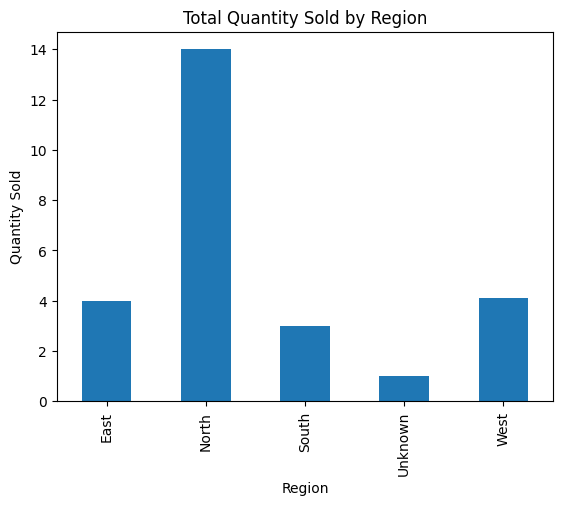

In [19]:
#Sales by region plot
region_summary['quantity'].plot(kind='bar')
plt.title("Total Quantity Sold by Region")
plt.xlabel("Region")
plt.ylabel("Quantity Sold")
plt.show()


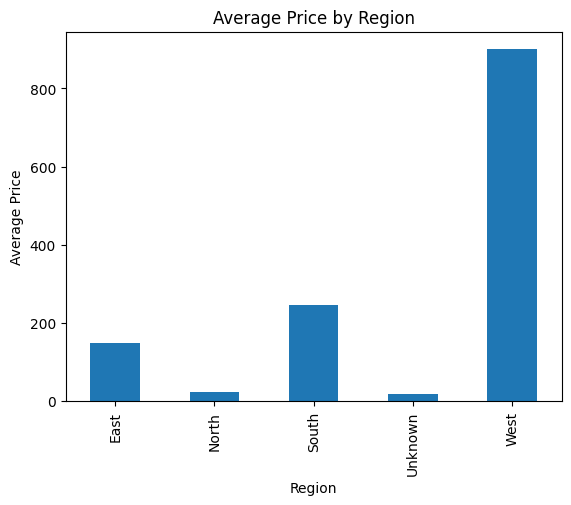

In [20]:
#Average price per region plot
region_summary['price'].plot(kind='bar')
plt.title("Average Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.show()


In [21]:
print("\nTop 3 products by quantity sold:")
top_products = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(3)
print(top_products)


Top 3 products by quantity sold:
product
Keyboard    14.0
Laptop       4.1
Monitor      4.0
Name: quantity, dtype: float64


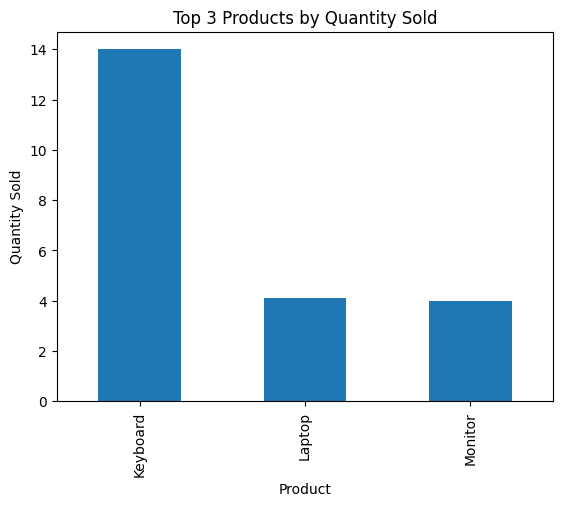

In [22]:
top_products.plot(kind='bar')
plt.title("Top 3 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()


# Creating Total sale columns and plotting it


In [23]:
df['total_sale'] = df['quantity'] * df['price']
df

,customer_name,product,quantity,price,sale_date,region,total_sale
0,Alice,Keyboard,5.0,25.000000,01/05/2023,North,125.0
1,Bob,Mouse,3.0,246.666667,03/05/2023,South,740.0
2,Unknown,Monitor,2.0,150.000000,01/05/2023,East,300.0
3,David,Keyboard,5.0,25.000000,01/05/2023,North,125.0
5,Eve,Laptop,3.1,900.000000,01/05/2023,West,2790.0
6,Frank,Mouse,1.0,20.000000,04/05/2023,Unknown,20.0
7,Grace,Monitor,2.0,150.000000,02/05/2023,East,300.0
9,Henry,Laptop,1.0,900.000000,05/05/2023,West,900.0
10,Ivy,Keyboard,4.0,25.000000,01/05/2023,North,100.0


In [24]:
print("\nDate with highest total sales:")
date_sales = df.groupby('sale_date')['total_sale'].sum()
print(date_sales.sort_values(ascending=False).head(1))


Date with highest total sales:
sale_date
01/05/2023    3440.0
Name: total_sale, dtype: float64


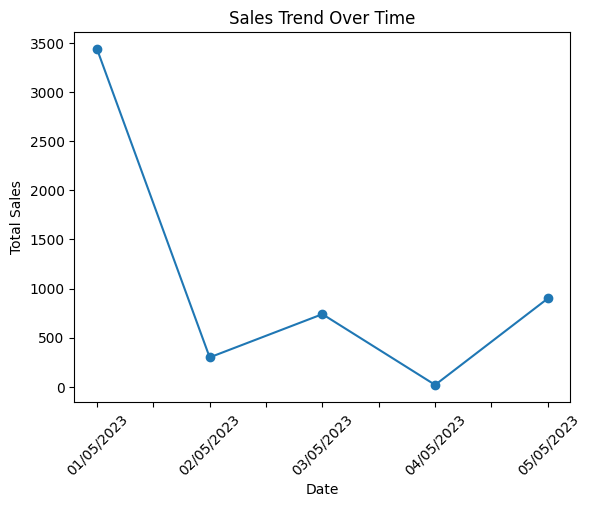

In [25]:
# Date with higher sales
date_sales.plot(kind='line', marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


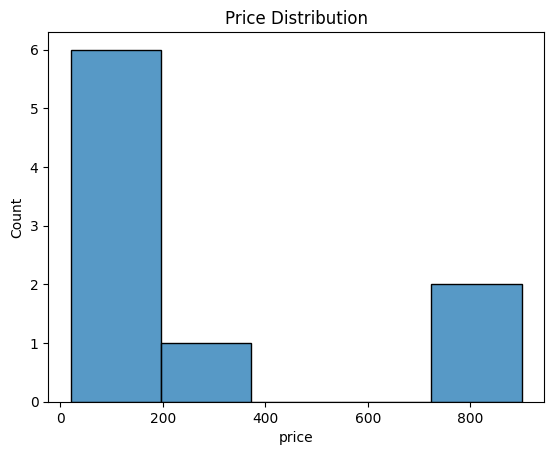

In [26]:
sns.histplot(df['price'], bins=5)
plt.title("Price Distribution")
plt.show()


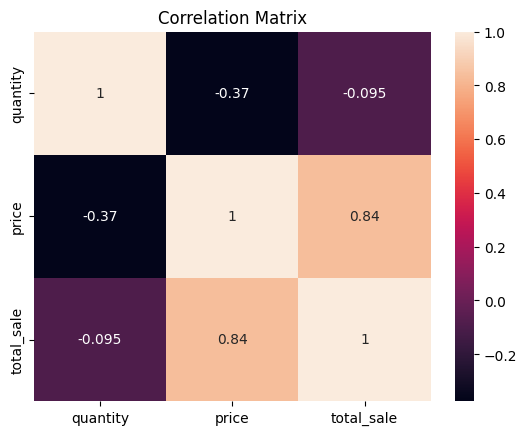

In [27]:
sns.heatmap(df[['quantity','price','total_sale']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


# Business insights summary

In [28]:
print("\nBusiness Insights Summary:")

print("\nRegion Wise Performance:")
print(df.groupby('region').agg({
    'quantity':'sum',
    'total_sale':'sum'
}))

print("\nMost Sold Product:")
print(df.groupby('product')['quantity'].sum().idxmax())



Business Insights Summary:

Region Wise Performance:
         quantity  total_sale
region                       
East          4.0       600.0
North        14.0       350.0
South         3.0       740.0
Unknown       1.0        20.0
West          4.1      3690.0

Most Sold Product:
Keyboard


# Saving cleaned Dataset

In [29]:
# Format numerical values for better presentation
df['price'] = df['price'].round(2)
df['quantity'] = df['quantity'].round(0)
df['total_sale'] = df['total_sale'].round(2)

In [30]:
df.to_csv('sales_data_cleaned.csv', index=False)
print("Cleaned data saved to 'sales_data_cleaned.csv'")


Cleaned data saved to 'sales_data_cleaned.csv'


# Result

In [31]:
print("\nANALYSIS COMPLETED SUCCESSFULLY")
print("Dataset cleaned, analyzed and visualized professionally.")



ANALYSIS COMPLETED SUCCESSFULLY
Dataset cleaned, analyzed and visualized professionally.
